Name: Rudy Orre  
Section: 0130  
Date: 2 May 2021

# Homework 7: Testing Hypotheses

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
pip install gofer-grader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.

from gofer.ok import check

## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins $\$$9 from the casino if it comes up heads and loses $\$$10 if it comes up tails.

**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

In [3]:
p_winning_after_two_flips = 1 - 1/4

In [4]:
check('tests/q1_1.py')


A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

**Question 2.** Define the null hypothesis and alternative hypothesis for this investigation. 

**Null hypothesis:** Customer isn't cheating because they have a normal chance of winning.

**Alternative hypothesis:** Customer is cheating because they have have a higher than normal chance of winning.

**Question 3.** Given the outcome of 20 games, which of the following test statistics would be a reasonable choice for this hypothesis test? 

*Hint*: For a refresher on choosing test statistics, check out this section on [Test Statistics](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty.html#Step-2:-The-Test-Statistic).

1. Whether there is at least one win.
1. Whether there is at least one loss.
1. The number of wins.
1. The number of wins minus the number of losses.
1. The total variation distance between the probability distribution of a fair coin and the observed distribution of heads and tails.
1. The total amount of money that the customer won.

Assign `reasonable_test_statistics` to a **list** of numbers corresponding to these test statistics.

In [5]:
reasonable_test_statistics = [3, 4, 6]

In [6]:
check('tests/q1_3.py')


<div class="hide">\pagebreak</div>
Suppose you decide to use the number of wins as your test statistic.

**Question 4.** Write a function called `simulate` that generates exactly one simulation of your test statistic under the Null Hypothesis.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin that lands heads or lands tails with 50% chance.

*Hint*: You may find the textbook [section](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models#predicting-the-statistic-under-the-model) on the `sample_proportions` function to be useful.

In [7]:
def simulate ():
    return sample_proportions(20, [0.5, 0.5]).item(0) * 20

simulate()

7.0

In [8]:
check('tests/q1_4.py')


**Question 5.** Using 10,000 trials, generate simulated values of the number of wins in 20 games. Assign `test_statistics_under_null` to an array that stores the result of each of these trials.

*Hint*: Feel free to use the function you defined in Question 4.

In [9]:
repetitions = 10000
test_statistics_under_null = np.array([simulate() for _ in range(repetitions)])
                                      
test_statistics_under_null

array([ 8., 10., 12., ..., 13., 11.,  8.])

In [10]:
check('tests/q1_5.py')


**Question 6.** Using the results from Question 5, generate a histogram of the empirical distribution of the number of wins in 20 games.

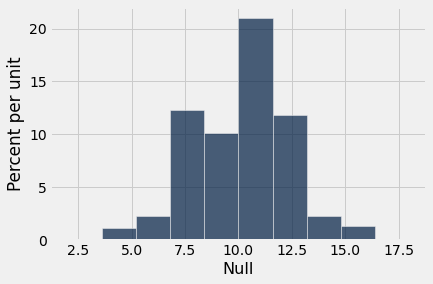

In [11]:
Table().with_column('Null', test_statistics_under_null).hist()

<div class="hide">\pagebreak</div>

**Question 7.** Compute an empirical P-value for this test.

*Hint:* Which values of our test statistic are in the direction of the alternative hypothesis?

In [12]:
p_value = len(Table().with_column(
    'Null', test_statistics_under_null).where('Null', are.above_or_equal_to(13)).column('Null')) / repetitions
p_value

0.1386

In [13]:
check('tests/q1_7.py')


**Question 8.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

If it is a cutoff of 1%, we would fail to reject the null hypothesis. If we take a look at the p_value, it has a value of 0.134, or 13.4%, which is an order magnitude greater than 1%, and is therefore not sufficent enough to blame the customer of cheating.

**Question 9.** Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

The `p_value` is neither the probability of the customer cheating nor the probability that the customer didn't cheat. The `p_value` is the probability of getting the outcome that the customer got, or better. Meaning that it is the probability of getting *at least* 13 out of the 20 coin flips correct.

**Question 10.** Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

The p_value cutoff is not the probability of whether or not the customer cheated, it is simply the cutoff for when we deem the p_value as a significant value. If the p_value is less than the p-value cutoff, that means that we would reject the null hypothesis because the probability of getting that specific outcome would be less than our cutoff percentage, which in this case is 1%.

**Question 11.** Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customers were actually cheating, can we compute how many we will incorrectly accuse of cheating? If so, what is the number? Explain your answer. Assume a 1% P-value cutoff.

If we have a p_value cutoff of 1%, then statistically, 1% of the customers will be acussed of cheating since each game that's played has a 1% chance of landing in the cutoff zone. So for 400 customers, this would mean that about 4 customers will be acussed of cheating.

## 2. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the very, very expensive vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

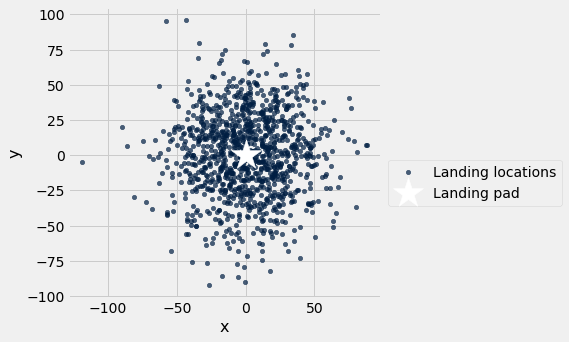

In [14]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

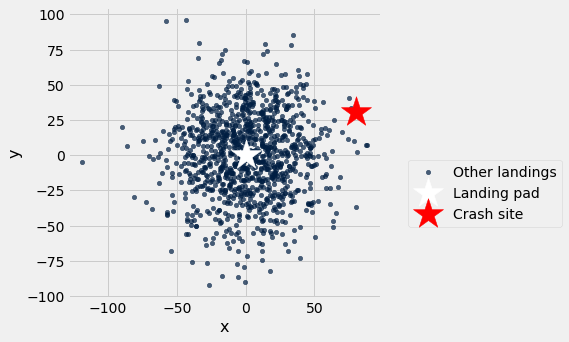

In [15]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

**Question 1.** Suppose we'd like to use hypothesis testing to shed light on this question.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** This landing was not special; its location was a draw from the same distribution as all 1100 others, it just so happened to be one of the more extreme landings due to sheer random chance.

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

**Question 2.** What's a good test statistic for this hypothesis test? 

*Hint:* A test statistic can be almost anything, but a *good* test statistic varies informatively depending on whether the null is true. So for this example, we might think about a test statistic that would be small if the null is true, and large otherwise. If we want to compare landings, we might want to see *how far* each landing is from some *reference point*, so we can compare all landings from the same vantage point.

**Test statistic:** We can use the distance from the landing pad as the test statistic. This would have to use the distance formula in order to calculate this statistic.

**Question 3.** Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [16]:
def landing_test_statistic(x_coordinate, y_coordinate):
    return (x_coordinate ** 2 + y_coordinate ** 2) ** 0.5

**Question 4.** The next three cells compute a P-value using your test statistic. Describe the test procedure in words. Is there a simulation involved? If so, what is being simulated? If not, why not? Where are we getting the data from? What kind of calculations are being performed? How are we calculating our p-value? 

*Hint:* Think about what a [simulation](https://www.inferentialthinking.com/chapters/09/3/simulation.html) actually consists of.

In [17]:
observed_test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

observed_test_stat

86.31440320131978

In [18]:
null_stats = make_array()
repetitions = ordinary_landing_spots.num_rows

for i in np.arange(repetitions):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)
    
null_stats

array([ 7.0373003 , 37.04323884, 28.24132651, ..., 20.84023432,
       32.48926398, 23.88691421])

In [19]:
p_value = np.count_nonzero(null_stats >= observed_test_stat) / len(null_stats)
p_value

0.012727272727272728

There is no simulation involved, only the computation of the distances for every datapoint in the landing spots dataset.  

**First Cell**  
This cell computes the test statistic based off of `landing_test_statistic()`, which computes the distance from the landing pad to the actual landing spot.  

**Second Cell**  
This cell computes the statistic for all of the landings, which means that we end up with an array that contains the distances between the landing pad and all recorded landings.  

**Third Cell**  
Finally, this cell computes the `p_value`, and it does this by finding how many of the recorded distances were greater than or equal to our test statistic distance, and then divides that by the total number of landings, which gives us the proportion of landings that were as extreme or even more extreme than our landing in question.  

**Final Verdict**  
Our `p_value` is 0.0127, or roughly 1.3%. This means that it is quite unlikely that our particular landing was due to random chance. However, whether we reject the null hypothesis or not is up to what p_value cutoff we picked at the beginning of the test. If we had picked 0.05 as our cutoff, then we would have rejected this null hypothesis, since 0.0127 is less than that. However, if we picked 0.01 as our cutoff, we would have failed to reject the null hypothesis, since our 0.013 is greater than that.

## 3. Testing Dice


Students in a Data Science class want to figure out whether a six-sided die is fair or not. On a fair die, each face of the die appears with chance 1/6 on each roll, regardless of the results of other rolls.  Otherwise, a die is called unfair.  We can describe a die by the probability of landing on each face.  This table describes an example of a die that is unfairly weighted toward 1:

|Face|Probability|
|-|-|
|1|.5|
|2|.1|
|3|.1|
|4|.1|
|5|.1|
|6|.1|

**Question 1.** Define a null hypothesis and an alternative hypothesis to test whether a six-sided die is fair or not. 

*Hint:* Remember that an unfair die is one for which each face does not have an equal chance of appearing.

**Null hypothesis:** The probability of rolling particular face is equal to rolling any other face.

**Alternative hypothesis:** The probability of rolling particular face is not equal to rolling any other face.

We decide to test the die by rolling it 5 times. The proportions of the 6 faces in these 5 rolls are stored in a table with 6 rows.  For example, here is the table we'd make if the die rolls ended up being 1, 2, 3, 3, and 5:

|Face|Proportion|
|-|-|
|1|.2|
|2|.2|
|3|.4|
|4|.0|
|5|.2|
|6|.0|

The function `mystery_test_statistic`, defined below, takes a single table like this as its argument and returns a number (which we will use as a test statistic).

In [20]:
# Note: We've intentionally used unhelpful function and
# variable names to avoid giving away answers.  It's rarely
# a good idea to use names like "x" in your code.

def mystery_test_statistic(sample):
    x = np.ones(1) * (1/6)
    y = (sample.column('Proportion') - x)
    return np.mean(y**2)

**Question 2.** Describe in English what the test statistic is.  Is it equivalent to the total variation distance between the observed face distribution and the fair die distribution?

The test statistic is **not** the total variation distance between the observed face distribution and the fair die distribution, however it is very similar. Instead of taking the mean of the absolute value of the difference between the distributions, it is rather the mean of the squared differneces between the distributions. This squaring of the differences not only acts like an absolute value by eliminating any negative signs, but it also multiplies that difference by itself, making bigger differences not proportionally worse, but squared worse.

This mystery test statistic is known as the **mean squared error**.

The function `simulate_observations_and_test` takes as its argument a table describing the probability distribution of a die.  It simulates one set of 5 rolls of that die, then tests the null hypothesis about that die using our test statistic function above.  It returns `False` if it *rejects* the null hypothesis about the die, and `True` otherwise.

In [21]:
# The probability distribution table for a fair die:
fair_die = Table().with_columns(
        "Face", np.arange(1, 6+1),
        "Probability", [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

def simulate_observations_and_test(actual_die):
    """Simulates die rolls from actual_die and tests the hypothesis that the die is fair.
    
    Returns False if that hypothesis is rejected, and True otherwise.
    
    """
    
    sample_size = 5
    p_value_cutoff = .2
    num_simulations = 250
    
    # Compute the observed value of the test statistic.
    observation_set = sample_proportions(sample_size, actual_die.column("Probability"))
    observation_props_table = Table().with_columns('Face', actual_die.column('Face'), 'Proportion', observation_set)
    observed_statistic = mystery_test_statistic(observation_props_table)
    
    # Simulate the test statistic repeatedly to get an 
    # approximation to the probability distribution of 
    # the test statistic, as predicted by the model in 
    # the null hypothesis. Store the simulated values 
    # of the test statistic in an array.
    simulated_statistics = make_array()
    for _ in np.arange(num_simulations):
        one_observation_set_under_null = sample_proportions(sample_size, fair_die.column("Probability"))
        simulated_props_table = Table().with_columns('Face', fair_die.column('Face'), 'Proportion', one_observation_set_under_null)
        simulated_statistic = mystery_test_statistic(simulated_props_table)
        simulated_statistics = np.append(simulated_statistics, simulated_statistic)
        
    # Compute the P-value
    p_value = np.count_nonzero(simulated_statistics >= observed_statistic) / num_simulations
    
    # If the P-value is below the cutoff, reject the 
    # null hypothesis and return False. Otherwise, 
    # return True.
    return p_value >= p_value_cutoff

# Calling the function to simulate a test of a fair die:
simulate_observations_and_test(fair_die)

True

**Question 3.** Use your knowledge of hypothesis tests and interpretation of the code above to compute the probability that `simulate_observations_and_test` returns `False` when its argument is `fair_die` (which is defined above the function). In other words, what are the odds that we reject the Null Hypothesis if the die is actually fair. 

You can call the function a few times to see what it does, but **don't** perform a simulation to compute this probability.  Use your knowledge of hypothesis tests. You shouldn't have to write any code to answer this question.

In [22]:
probability_of_false = 0.2

In [23]:
check('tests/q3_3.py')


**Question 4.** Why is your answer to Question 3 the correct probability?

Because 0.2 is the `p_value_cutoff` in the function `simulate_observations_and_test()`. If proportion of simulated test statistics greater than the observed statistic is less than that cutoff value, then it means that we reject the null hypothesis.  

This means that if we use this simulation against a fair die, it would fail 0.2 or 20% of the time, since it has a 20% chance of randomly having a simulated test to observed test ratio less than 0.2.

**Question 5.** Simulate the process of running `simulation_observations_and_test` 300 times. Assign `test_results` to an array that stores the result of each of these trials.

**Note:** This will be a little slow. 300 repetitions of the simulation should require a minute or so of computation, and should suffice to get an answer that's roughly correct.

In [24]:
num_test_simulations = 300
test_results = np.array([simulate_observations_and_test(fair_die) for _ in range(num_test_simulations)])

# Don't change the following line.
test_results.astype(bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [25]:
check('tests/q3_5.py')


**Question 6.** Verify your answer to Question 3 by computing an approximate probability that `simulation_observations_and_test` returns `False`.

In [26]:
approximate_probability_of_false = 1- np.count_nonzero(test_results.astype(bool)) / num_test_simulations
approximate_probability_of_false

0.16000000000000003

In [27]:
check('tests/q3_6.py')


**Question 7.** From the perspective of someone who wants to know the truth about the die, is it good or bad for the function to return `False` when its argument is `fair_die`? Why is it good or bad?

To an extent, I think it returning `False` is okay as long as the person is running this several times. However, I believe a better solution to a simulation function would one that would run that simulation multiple times, and would then return what proportion of the simulations returned true/false. I believe something like this would be far more insightful than just a function that returns true or false, and gives no context.

## 4. A Potpourri of Tests


The rest of this homework is optional. Do it for your own practice, but it will not be incorporated into the final grading!

**Question 1 (Optional).** Many scientific disciplines use 5% as a standard cutoff for rejecting the null hypothesis when conducting hypothesis tests.  Suppose for sake of argument that every scientific paper hinges on exactly one hypothesis test with a 5% cutoff.  After learning about hypothesis testing, Thomas despairs about the state of scientific research, wondering:

> "Doesn't this mean that 5% of all scientific papers are wrong?"

Under what conditions would Thomas’s worry be realistic, and why is it not entirely accurate?

*Write your answer here, replacing this text.*

**Question 2 (Optional).** Many scientists hope to make exciting and unintuitive discoveries.  Often the null hypothesis in an hypothesis test is something boring ("the sky is blue"), while the alternative is surprising ("the sky is not blue!").

Suppose a scientist has an exciting but incorrect idea, so that their null hypothesis is *truly correct*.  When an hypothesis test is run on a sample of data, it fails to reject the null when using a 5% cutoff.  Disappointed but determined, the scientist gathers 10 more samples and runs the same test on each sample (running 10 separate hypothesis tests, each with a 5% cutoff).  If any of the tests rejects the null, the scientist publishes that one.  What is the chance that any of those tests rejects the null hypothesis?

*Write your answer here, replacing this text.*

**Note:** The scientist in this scenario is acting very unethically, but (probably milder) forms of this [*publication bias*](https://en.wikipedia.org/wiki/Publication_bias) seem to be a real problem in science today. See a relevant [xkcd](https://xkcd.com/882/) below.

![So, uh, we did the green study again and got no link. It was probably a--' 'RESEARCH CONFLICTED ON GREEN JELLY BEAN/ACNE LINK; MORE STUDY RECOMMENDED!](https://imgs.xkcd.com/comics/significant.png)

## 5. Submission


Congratulations, you're done with Homework 7!  Be sure to 
- **run all the tests and verify that they all pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Hit the Submit button** Your submission will be saved and grade will be posted when it's finished running.

In [28]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import grade_notebook
if not globals().get('__GOFER_GRADER__', False):
    display(grade_notebook('hw07.ipynb', sorted(glob.glob('tests/q*.py'))))

['tests/q1_1.py', 'tests/q1_3.py', 'tests/q1_4.py', 'tests/q1_5.py', 'tests/q1_7.py', 'tests/q3_3.py', 'tests/q3_5.py', 'tests/q3_6.py']
Question 1:


Question 2:


Question 3:


Question 4:


Question 5:


Question 6:


Question 7:


Question 8:


1.0

Name: Rudy Orre  
Section: 0130  
Date: 2 May 2021